Note: If you are using the Google Colab and want to use tensorflow < 2: you will have to downgrade using this link. https://colab.research.google.com/notebooks/tensorflow_version.ipynb

# Sentiment Analysis on IMDB Movie Review dataset

Sentiment analysis is one of the key areas of research in NLP and Sequence modelling. We will be using LSTMs and Bi-directional LSTMs to predict two classes - positive or negative sentiment.


You will be reading the dataset from here: https://drive.google.com/file/d/127PCwycL0oToSF6l-c2oFuBkacYsmlgK/view?usp=sharing

You can use this blog for understanding: https://towardsdatascience.com/word-embeddings-for-sentiment-analysis-65f42ea5d26e

In [0]:
import numpy as np 
import pandas as pd 
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Conv1D, Dropout, Bidirectional
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [0]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
from nltk.tokenize import word_tokenize

In [0]:
import matplotlib.pyplot as plt

All the relevant libraries are imported. 
You are free to change as you please. 
Using the GPU backend is recommended as LSTMs are computationally expensive to train.



## Data handling - exploration and cleaning





1.   You are expected to read the dataset into a dataframe.
2.   This is a real world dataset and you will be expected to clean the dataset.

1.   This includes removing trailing spaces and HTML tags.






In [0]:
df = pd.read_csv('/content/drive/My Drive/sad/IMDB Dataset.csv')


In [0]:
print(df['review'][0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

### Data Cleaning - write the techniques you employed and the achieved results

In [0]:
# WRITE CODE HERE
# Sample code:
tag = re.compile(r'<[^>]+>')
pat=r'[^a-zA-z0-9\s]'
lace = re.compile("[.;:!\'?,\"()\[\]]")
reace= re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
for i in range(len(df['review'])):
      df['review'][i]=tag.sub('',df['review'][i])
      df['review'][i]=re.sub(pat,'',df['review'][i])
      df['review'][i]=df['review'][i].rstrip()
      df['review'][i]=lace.sub("",df['review'][i])
      df['review'][i]=reace.sub(" ",df['review'][i])


In [0]:
print(df)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production The filming tech...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically theres a family where a little boy J...  negative
4      Petter Matteis Love in the Time of Money is a ...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot bad dialogue bad acting idiotic direc...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  Im going to have to disagree with the previous...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [0]:
'''
the data cleaning techniques are straightforward
we define the terms the cause trouble i.e. punctuation, html tags, brackets, numbers etc
furthermore we remove trailing spaces
we can also change the lower/upper case of the elements but we do not consider that necessary at this stage
finally these are either completely removed or exchanged with spaces

'''

Write about the techniques used to clean:

### Data Exploration



1.   You are required to report the total number of distinct tokens present in the data set.
2.   Find out the minimum and max length of a review.

An integral part of visualization when it comes to textual data is the generating of a word cloud.

1.   
This task is open-ended and you can use any library of your choice. 
NLTK is one such library. 
2.   
Make sure to keep note of stop words.

##Example:


![alt text](https://getthematic.com/wp-content/uploads/2018/03/Harris-Word-Cloud-e1522406279125.png)




In [0]:
#remove stop words
jk=stopwords.words('english')
for i in range(len(df['review'])):
  tokens = nltk.word_tokenize(df['review'][i])
  df['review'][i] = [word for word in tokens if not word in jk]

In [0]:
print(df['review'][0])

['One', 'reviewers', 'mentioned', 'watching', '1', 'Oz', 'episode', 'youll', 'hooked', 'They', 'right', 'exactly', 'happened', 'meThe', 'first', 'thing', 'struck', 'Oz', 'brutality', 'unflinching', 'scenes', 'violence', 'set', 'right', 'word', 'GO', 'Trust', 'show', 'faint', 'hearted', 'timid', 'This', 'show', 'pulls', 'punches', 'regards', 'drugs', 'sex', 'violence', 'Its', 'hardcore', 'classic', 'use', 'wordIt', 'called', 'OZ', 'nickname', 'given', 'Oswald', 'Maximum', 'Security', 'State', 'Penitentary', 'It', 'focuses', 'mainly', 'Emerald', 'City', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', 'privacy', 'high', 'agenda', 'Em', 'City', 'home', 'manyAryans', 'Muslims', 'gangstas', 'Latinos', 'Christians', 'Italians', 'Irish', 'moreso', 'scuffles', 'death', 'stares', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'awayI', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goes', 'shows', 'wouldnt', 'dare', 'Forget', 'pretty', '

In [0]:
#WRITE CODE HERE
#count max length
a=0
for i in range(len(df['review'])):
  if len(df['review'][i])>a:
    a=len(df['review'][i])

print(a)

1491


In [0]:
#count min length
b=99999999999
for i in range(len(df['review'])):
  if len(df['review'][i])<b:
    b=len(df['review'][i])

print(b)

4


In [0]:
store=dict()
for i in range(len(df['review'])):
  text=df['review'][i]
    
  for k in text:
    if k in store:
      store[k]+=1
    else:
      store[k]=1
  distinct=0
    
  for word,rep in store.items():
      if rep==1:
          distinct+=1
  print(distinct)
  

Streaming output truncated to the last 5000 lines.
149202
149204
149205
149205
149211
149214
149216
149217
149217
149218
149225
149225
149226
149227
149227
149231
149233
149233
149239
149239
149239
149238
149236
149240
149240
149243
149250
149255
149260
149259
149271
149275
149275
149276
149276
149275
149276
149276
149279
149282
149285
149286
149292
149295
149296
149301
149301
149301
149305
149305
149307
149327
149327
149329
149330
149333
149333
149333
149333
149334
149333
149336
149336
149337
149341
149342
149342
149342
149345
149346
149348
149348
149349
149348
149350
149350
149349
149351
149356
149355
149356
149356
149357
149359
149359
149361
149361
149363
149368
149371
149372
149375
149377
149383
149389
149397
149395
149400
149416
149418
149421
149425
149429
149432
149433
149435
149437
149439
149441
149441
149444
149447
149452
149453
149458
149458
149458
149460
149460
149461
149466
149471
149472
149485
149489
149491
149493
149493
149493
149494
149494
149497
149503
149503
149503
1495

In [0]:
for i in range(df.shape[0]):
  ''.join(df['review'][i])
t=" ".join([str(i) for i in df.review])


In [0]:
print(df['review'][0][1])

reviewers


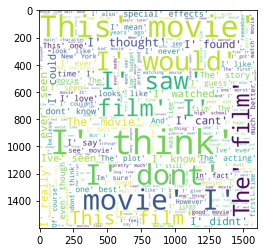

In [0]:

pic = WordCloud(background_color="white", max_words=200, width=1600, height=1600).generate(t)
plt.imshow(pic)

### Model processing

You can use a 70:30 train/test split.
The labels are 'positive' and negative, you should assign them integers 0 or 1 for further processing.

In [0]:
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt

In [0]:

from keras.datasets import imdb
from keras.models import Sequential
from wordcloud import WordCloud
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical

from tensorflow.keras.optimizers import Adam, SGD, RMSprop


### Tokenizer
You will need to use fit a tokenizer over your training and testing data.

What does a tokenizer do?
It creates a dictionary of word to integer mappings. It updates internal vocabulary based on a list of texts. You should read up on the documentation before diving into the code. 

You will also be using the the text_to_sequence function will return integers based on a respective tokenizer.

Make sure you **pad** your sequences to max length using sequence.pad_sequences()




In [0]:
for i in range(df.shape[0]):
  df['review'][i]=(" ").join(df['review'][i])

In [0]:
print(df)

                                                  review sentiment
0      One reviewers mentioned watching 1 Oz episode ...  positive
1      A wonderful little production The filming tech...  positive
2      I thought wonderful way spend time hot summer ...  positive
3      Basically theres family little boy Jake thinks...  negative
4      Petter Matteis Love Time Money visually stunni...  positive
...                                                  ...       ...
49995  I thought movie right good job It wasnt creati...  positive
49996  Bad plot bad dialogue bad acting idiotic direc...  negative
49997  I Catholic taught parochial elementary schools...  negative
49998  Im going disagree previous comment side Maltin...  negative
49999  No one expects Star Trek movies high art fans ...  negative

[50000 rows x 2 columns]


In [0]:
# WRITE CODE HERE
X_train, X_test,y_train,y_test = train_test_split(df.review,df.sentiment, test_size=0.3, random_state=30)
f = Tokenizer(num_words=10000,  split=" ")
f.fit_on_texts(X_train)
X_train = f.texts_to_sequences(X_train)
X_test = f.texts_to_sequences(X_test)
X_train2 = pad_sequences(X_train, maxlen=1491)
X_test2 = pad_sequences(X_test, maxlen=1491)
le = LabelEncoder()
y_train1 = le.fit_transform(y_train)
y_test1 = le.transform(y_test)
y_train2 = to_categorical(y_train1)
y_test2 = to_categorical(y_test1)

### Embedding layer
You will be importing the embedding layer from Keras.
Embedding layers are common place when handling textual data. 
Word embeddings provide a dense representation of words and their relative meanings.

#### How do they work - via Stack Overflow
Link: https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work

The output vectors are not computed from the input using any mathematical operation. Instead, each input integer is used as the index to access a table that contains all posible vectors. That is the reason why you need to specify the size of the vocabulary as the first argument (so the table can be initialized).

The most common application of this layer is for text processing. Let's see a simple example. Our training set consists only of two phrases:

Hope to see you soon

Nice to see you again

So we can encode these phrases by assigning each word a unique integer number (by order of appearance in our training dataset for example). Then our phrases could be rewritten as:

[0, 1, 2, 3, 4]

[5, 1, 2, 3, 6]

Now imagine we want to train a network whose first layer is an embeding layer. In this case, we should initialize it as follows:

Embedding(7, 2, input_length=5)

The first argument (7) is the number of distinct words in the training set. The second argument (2) indicates the size of the embedding vectors. The input_length argumet, of course, determines the size of each input sequence.

Once the network has been trained, we can get the weights of the embedding layer, which in this case will be of size (7, 2) and can be thought as the table used to map integers to embedding vectors.


### Model Engineering

You will be required to engineer three types of models from scratch.

1.   Using LSTMs
2.   Bi-directional LSTMs

1.   A model with less than 10,000 parameters - the lower the parameters, higher the score (provided accuracy is good)


For each model:

1.   You will be reporting graphs for validation accuracy and training loss.
2.   What hyper-parameters, loss functions, optimizations, initializations were used. This should be clearly stated in your analysis.

~90 percent and above is the desired accuracy. 

For model 3, CLEARLY report the number of parameters.




In [0]:

# Some example code to help you get started
# X_train is your training data 
# input_dim is your dictionary length, output_dim is the length is the dimension of the dense embedding, you can choose whatever works best for you, starting with 2.
model = Sequential()
model.add(Embedding(10000, 10, input_length=X_train2.shape[1]))
model.add(Dropout(0.5))

model.add(LSTM(200))
model.add(Dense(2,activation='softmax'))

adam=Adam(lr=0.001)
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())
# You can choose to complete this model per your choice

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1491, 10)          100000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1491, 10)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 200)               168800    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 402       
Total params: 269,202
Trainable params: 269,202
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
y=model.fit(X_train2, y_train2,batch_size=512, epochs = 5, validation_data=(X_test2,y_test2), validation_freq=1,verbose = 1)


Train on 35000 samples, validate on 15000 samples
Epoch 1/5
35000/35000 [==============================] - 250s 7ms/step - loss: 0.6827 - accuracy: 0.5999 - val_loss: 0.6464 - val_accuracy: 0.6823
Epoch 2/5
35000/35000 [==============================] - 248s 7ms/step - loss: 0.5485 - accuracy: 0.7515 - val_loss: 0.3811 - val_accuracy: 0.8380
Epoch 3/5
35000/35000 [==============================] - 248s 7ms/step - loss: 0.3109 - accuracy: 0.8682 - val_loss: 0.2967 - val_accuracy: 0.8734
Epoch 4/5
35000/35000 [==============================] - 245s 7ms/step - loss: 0.2364 - accuracy: 0.9056 - val_loss: 0.2765 - val_accuracy: 0.8915
Epoch 5/5
35000/35000 [==============================] - 243s 7ms/step - loss: 0.2148 - accuracy: 0.9158 - val_loss: 0.2736 - val_accuracy: 0.8916


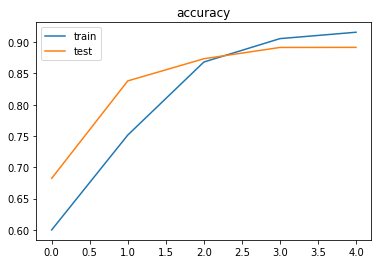

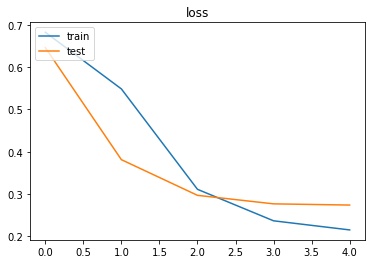

In [0]:
plt.plot(y.history['accuracy'])
plt.plot(y.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(y.history['loss'])
plt.plot(y.history['val_loss'])
plt.title('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# CODE HERE

model2 = Sequential()
model2.add(Embedding(10000, 10, input_length=X_train2.shape[1]))
model2.add(Dropout(0.4))
model2.add(Bidirectional(LSTM( 200, dropout_U = 0.2, dropout_W = 0.2)))
model2.add( Dense(2, activation = 'softmax'))

model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model2.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(200, dropout=0.2, recurrent_dropout=0.2)`
  """


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1491, 10)          100000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1491, 10)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 400)               337600    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 802       
Total params: 438,402
Trainable params: 438,402
Non-trainable params: 0
_________________________________________________________________


In [0]:
part2=model2.fit(X_train2, y_train2,batch_size=412, epochs = 5, validation_data=(X_test2,y_test2), validation_freq=1,verbose = 1)


Train on 35000 samples, validate on 15000 samples
Epoch 1/5
35000/35000 [==============================] - 672s 19ms/step - loss: 0.6201 - accuracy: 0.6535 - val_loss: 0.4109 - val_accuracy: 0.8163
Epoch 2/5
35000/35000 [==============================] - 666s 19ms/step - loss: 0.3487 - accuracy: 0.8511 - val_loss: 0.3162 - val_accuracy: 0.8692
Epoch 3/5
35000/35000 [==============================] - 633s 18ms/step - loss: 0.2799 - accuracy: 0.8864 - val_loss: 0.2871 - val_accuracy: 0.8835
Epoch 4/5
35000/35000 [==============================] - 638s 18ms/step - loss: 0.2676 - accuracy: 0.8923 - val_loss: 0.3057 - val_accuracy: 0.8725
Epoch 5/5
35000/35000 [==============================] - 630s 18ms/step - loss: 0.2337 - accuracy: 0.9086 - val_loss: 0.2974 - val_accuracy: 0.8783


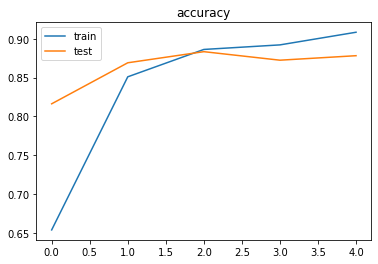

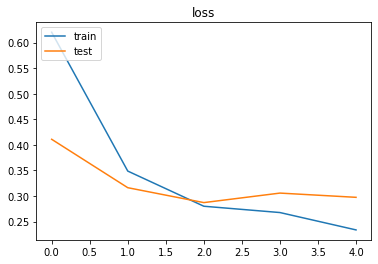

In [0]:
plt.plot(part2.history['accuracy'])
plt.plot(part2.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(part2.history['loss'])
plt.plot(part2.history['val_loss'])
plt.title('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
X_train, X_test,y_train,y_test = train_test_split(df.review,df.sentiment, test_size=0.3, random_state=37)
f = Tokenizer(num_words=200,  split=" ")
f.fit_on_texts(X_train)
X_train1 = f.texts_to_sequences(X_train)
X_test1= f.texts_to_sequences(X_test)
X_train2 = pad_sequences(X_train1, maxlen=1491)
X_test2 = pad_sequences(X_test1, maxlen=1491)
le = LabelEncoder()
y_train1 = le.fit_transform(y_train)
y_test1 = le.transform(y_test)
y_train2 = to_categorical(y_train1)
y_test2 = to_categorical(y_test1)

In [0]:
model3 = Sequential()
model3.add(Embedding(200, 2, input_length=X_train2.shape[1]))
model3.add(Dropout(0.4))

model3.add(LSTM(40))
model3.add(Dense(2,activation='softmax'))

adam=Adam(lr=0.001)
model3.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model3.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1491, 2)           400       
_________________________________________________________________
dropout_2 (Dropout)          (None, 1491, 2)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 40)                6880      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 82        
Total params: 7,362
Trainable params: 7,362
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
part3=model3.fit(X_train2, y_train2,batch_size=512, epochs = 10, validation_data=(X_test2,y_test2), validation_freq=1,verbose = 1)


Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 232s 7ms/step - loss: 0.6891 - accuracy: 0.5473 - val_loss: 0.6729 - val_accuracy: 0.6080
Epoch 2/10
35000/35000 [==============================] - 231s 7ms/step - loss: 0.6477 - accuracy: 0.6714 - val_loss: 0.6260 - val_accuracy: 0.6271
Epoch 3/10
35000/35000 [==============================] - 235s 7ms/step - loss: 0.6219 - accuracy: 0.6633 - val_loss: 0.5800 - val_accuracy: 0.7195
Epoch 4/10
35000/35000 [==============================] - 229s 7ms/step - loss: 0.5728 - accuracy: 0.6983 - val_loss: 0.5329 - val_accuracy: 0.7423
Epoch 5/10
35000/35000 [==============================] - 227s 6ms/step - loss: 0.5550 - accuracy: 0.7134 - val_loss: 0.5163 - val_accuracy: 0.7505
Epoch 6/10
35000/35000 [==============================] - 227s 6ms/step - loss: 0.5418 - accuracy: 0.7227 - val_loss: 0.5087 - val_accuracy: 0.7565
Epoch 7/10
35000/35000 [==============================] - 229s

### Model Predictions. For your best performing model

Come up with ten sample sentences NOT part of the original data set. 
Use model.predict() to generate predictions and report positive or negative sentiment.

In [0]:
yip=["The movie sucks and is terrible",
      "I have not considered suicide thoughts but i imagine this movie heavily increased the suicide rate",
      "I would be lieing if i did not acknowledge this movie for the orgasmic masterpiece it was",
      "The movie did not meet expectations",
      "Half way through the movie becomes cliche and banal showing the tardiness in directing and screenplay",
      "ok this movie was absolutely lovely",
      "this movie would have been alot more interesting if the directors had forgotten to make it",
      "I hated the happy ending",
      "this movie provides an ambitious juxtaposition between the working class and the slaves",
      "My absolute favourite movie of all time"]
f.fit_on_texts(yip)
j = f.texts_to_sequences(yip)
j = pad_sequences(j, maxlen=1491)
pred=model2.predict(j)
print(pred)

[[0.5968728  0.40312722]
 [0.7043994  0.2956006 ]
 [0.71076155 0.2892385 ]
 [0.7620531  0.23794691]
 [0.6343662  0.36563373]
 [0.57191515 0.42808488]
 [0.7435341  0.2564659 ]
 [0.58180845 0.41819155]
 [0.5668702  0.43312982]
 [0.58181125 0.41818872]]


In [0]:
'''
The model is somewhat able to show which phrase are positive and negative but mostly it
states middle values which are barely discernable
'''